In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.axes import Axes 
import matplotlib.text as mtext
from matplotlib.patches import Rectangle

In [2]:
demeter_fn = 'Demeter_results/demeter_spark_comprehensive_stats_all_data.csv'
demeter_data = pd.read_csv(demeter_fn)
demeter_data = demeter_data[['data','#cores','run','demeter_log_runtime','demeter_log_cputime']]
demeter_data.columns=['data','#processors','run','elapsed','CPU time']

demeter_data["CPU time/processor"] = demeter_data["CPU time"].divide(demeter_data["#processors"])


demeter_data["CPU time/processor"] = demeter_data["CPU time/processor"] / 1000 ## ms to second
demeter_data['CPU time'] = demeter_data['CPU time']/1000 ## ms to second

demeter_data['non-CPU time'] = demeter_data['elapsed'].multiply(demeter_data['#processors']) - demeter_data['CPU time']
demeter_data["non-CPU time/processor"] = demeter_data['non-CPU time'].divide(demeter_data["#processors"])

demeter_data['Platform'] = 'Demeter'

demeter_data = demeter_data[['data','#processors','run','elapsed','CPU time',
                             'non-CPU time','Platform', "CPU time/processor", "non-CPU time/processor"]]

demeter_data['CPU time'] = np.log10(demeter_data['CPU time']/60.0)
demeter_data['non-CPU time'] = np.log10(demeter_data['non-CPU time']/60.0)
demeter_data['elapsed'] = np.log10(demeter_data['elapsed']/60.0)
demeter_data['CPU time/processor'] = np.log10(demeter_data['CPU time/processor']/60.0)
demeter_data['non-CPU time/processor'] = np.log10(demeter_data['non-CPU time/processor']/60.0)

In [3]:
minerva_fn = 'Minerva_results/minerva-all-usage.csv'
minerva_data = pd.read_csv(minerva_fn,index_col=0)
minerva_data = minerva_data[['data','cores','fold','duration','cpu','noncpu']]
minerva_data.columns=['data','#processors','run','elapsed','CPU time','non-CPU time']
minerva_data['Platform'] = 'Minerva'
minerva_data = minerva_data[['data','#processors','run','elapsed','CPU time','non-CPU time','Platform']]
minerva_data = minerva_data.loc[minerva_data['CPU time'] > 1000]

minerva_data["CPU time/processor"] = minerva_data['CPU time'].divide(minerva_data['#processors'])
minerva_data["non-CPU time/processor"] = minerva_data['non-CPU time'].divide(minerva_data['#processors'])

minerva_data['CPU time'] = np.log10(minerva_data['CPU time']/60.0)
minerva_data['non-CPU time'] = np.log10(minerva_data['non-CPU time']/60.0)
minerva_data['elapsed'] = np.log10(minerva_data['elapsed']/60.0)
minerva_data["CPU time/processor"] = np.log10(minerva_data['CPU time/processor']/60.0)
minerva_data["non-CPU time/processor"] = np.log10(minerva_data['non-CPU time/processor']/60.0)
minerva_data

,data,#processors,run,elapsed,CPU time,non-CPU time,Platform,CPU time/processor,non-CPU time/processor
0,drosophila,1,1,2.308529,2.318550,2.298271,Minerva,2.318550,2.298271
6,drosophila,1,2,2.292108,2.302114,2.281866,Minerva,2.302114,2.281866
12,drosophila,1,3,2.290962,2.299798,2.281942,Minerva,2.299798,2.281942
18,drosophila,1,4,2.292293,2.301573,2.282811,Minerva,2.301573,2.282811
24,drosophila,1,5,2.217045,2.219191,2.214888,Minerva,2.219191,2.214888
...,...,...,...,...,...,...,...,...,...
3,thaliana,24,5,1.062582,2.332203,1.868449,Minerva,0.951991,0.488237
4,thaliana,24,6,1.156347,2.413886,1.995562,Minerva,1.033675,0.615351
5,thaliana,24,7,1.005037,2.259275,1.852785,Minerva,0.879064,0.472574
6,thaliana,24,9,1.040075,2.287279,1.905256,Minerva,0.907068,0.525045


In [101]:
def plt_time(dn):
    figure = plt.figure(figsize=(8,6))
    minerva_df = minerva_data.loc[minerva_data.data == dn]
    demeter_df = demeter_data.loc[demeter_data.data == dn]
    sns.set_style('ticks', {'axes.grid': True, 'grid.color': '.8',})
    # Elapsed
    sns.pointplot(data=minerva_df,x='#processors',y='elapsed',linestyles='-',color='blue',legend=False) #Minerva
    sns.pointplot(data=demeter_df,x='#processors',y='elapsed',linestyles='--',color='blue',legend=False)#Demeter
    # CPU_T/Processor
    sns.pointplot(data=minerva_df,x='#processors',y='CPU time/processor',linestyles='-',color='red',legend=False)
    sns.pointplot(data=demeter_df,x='#processors',y='CPU time/processor',linestyles='--',color='red',legend=False)
    # non-CPU_T/Processor
    sns.pointplot(data=minerva_df,x='#processors',y='non-CPU time/processor',linestyles='-',color='green',legend=False)
    sns.pointplot(data=demeter_df,x='#processors',y='non-CPU time/processor',linestyles='--',color='green',legend=False)

    plt.tick_params(axis='both', which='major', labelsize=16)

    plt.xlabel('#Processors',fontsize=20)
    plt.ylabel(r'Time Required ($\rmlog_{\rm10}$(minutes))',fontsize=20)
    lines = [Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0),
             Line2D([0], [0],linewidth=2, linestyle='-', color= 'blue'),
             Line2D([0], [0],linewidth=2, linestyle='-', color= 'red'),
             Line2D([0], [0],linewidth=2, linestyle='-', color= 'green'),
             Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0),         
             Line2D([0], [0],linewidth=2, linestyle='--', color= 'blue'),
             Line2D([0], [0],linewidth=2, linestyle='--', color= 'red'),
             Line2D([0], [0],linewidth=2, linestyle='--', color= 'green')]

    #labels = ["Minerva", "Demeter", "elapsed", "CPU time", "non-CPU time"]
    
    legend_label = ["Minerva", "elapsed time","CPU time", "non-CPU time", 
                    "Demeter", "elapsed time","CPU time","non-CPU time"]
    plt.legend(lines,legend_label, loc=1, 
               prop={'size': 13, "weight":"bold"},frameon=False,ncol=2)
    return(figure)

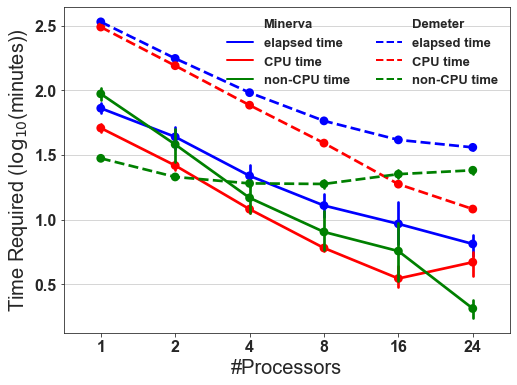

In [102]:
f1 = plt_time("pf1")
plt.savefig("paper_figures/Figure2a_pf1_time_v3.pdf", bbox_inches="tight", dpi=300)
#plt_time("thaliana", ax2)

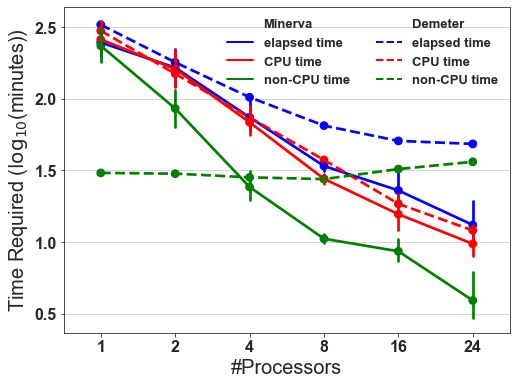

In [103]:
f1 = plt_time("thaliana")
plt.savefig("paper_figures/Figure2b_thaliana_time_v3.pdf", bbox_inches="tight", dpi=300)
#plt_time("thaliana", ax2)